In [5]:
# Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from matplotlib.dates import DateFormatter
import matplotlib.dates as dates
from sklearn.linear_model import LinearRegression
from datetime import datetime
from sklearn.metrics import mean_squared_error, r2_score
import holidays

df = pd.read_csv('/datc/parcel/notebooks/data/postnl/20201014_300_klanten.csv', parse_dates=[0])
df

,procesdag,cust_id,aantal_pakketten,aantal_pakketten_volgende_dag,validation_column
0,2015-01-02,klant_1,0,0,train
1,2015-01-02,klant_100,0,0,train
2,2015-01-02,klant_101,0,0,train
3,2015-01-02,klant_103,0,0,train
4,2015-01-02,klant_104,0,0,train
...,...,...,...,...,...
505695,2020-04-29,klant_95,68,60,test
505696,2020-04-29,klant_96,0,0,test
505697,2020-04-29,klant_97,66,123,test
505698,2020-04-29,klant_98,2035,2133,test


In [44]:
#manipulate Data
cust_filter = df['cust_id'] == 'klant_165'
df_filter = df['procesdag'].dt.dayofweek <= 7
data = df.where(df_filter & cust_filter).dropna()
data

,procesdag,cust_id,aantal_pakketten,aantal_pakketten_volgende_dag,validation_column
59,2015-01-02,klant_165,17.0,0.0,train
319,2015-01-03,klant_165,0.0,0.0,train
579,2015-01-04,klant_165,0.0,56.0,train
839,2015-01-05,klant_165,56.0,82.0,train
1099,2015-01-06,klant_165,82.0,390.0,train
...,...,...,...,...,...
504459,2020-04-25,klant_165,0.0,0.0,test
504719,2020-04-26,klant_165,0.0,0.0,test
504979,2020-04-27,klant_165,0.0,119.0,test
505239,2020-04-28,klant_165,119.0,70.0,test


In [45]:
data = data.set_index(data.procesdag, drop=True)

In [46]:
data_Jan_2015 = data['2015-01-01':'2015-02-01']

In [47]:
data_vorige_week = data_Jan_2015.copy()
data_vorige_week['aantal_pakketten_vorige_week'] = data_vorige_week['aantal_pakketten'].shift(7)
data_vorige_week['aantal_pakketten_vorige_week'].fillna(0, inplace=True)

In [48]:
data_vorige_week

,procesdag,cust_id,aantal_pakketten,aantal_pakketten_volgende_dag,validation_column,aantal_pakketten_vorige_week
procesdag,,,,,,
2015-01-02,2015-01-02,klant_165,17.0,0.0,train,0.0
2015-01-03,2015-01-03,klant_165,0.0,0.0,train,0.0
2015-01-04,2015-01-04,klant_165,0.0,56.0,train,0.0
2015-01-05,2015-01-05,klant_165,56.0,82.0,train,0.0
2015-01-06,2015-01-06,klant_165,82.0,390.0,train,0.0
2015-01-07,2015-01-07,klant_165,390.0,32.0,train,0.0
2015-01-08,2015-01-08,klant_165,32.0,36.0,train,0.0
2015-01-09,2015-01-09,klant_165,36.0,0.0,train,17.0
2015-01-10,2015-01-10,klant_165,0.0,0.0,train,0.0


In [49]:
#Filters
train_start = data_vorige_week['procesdag'] >= datetime(year=2015, month=1, day=9)
train_end = data_vorige_week['procesdag'] <= datetime(year=2015, month=1, day=23)
test_start = data_vorige_week['procesdag'] >= datetime(year=2015, month=1, day=24)
test_end = data_vorige_week['procesdag'] <= datetime(year=2015, month=1, day=31)

# Split train and test
train = data_vorige_week.where(train_start & train_end).dropna()
test = data_vorige_week.where(test_start & test_end).dropna()

# Define X and Y train
x_train = train[['aantal_pakketten_vorige_week']]
y_train = train[['aantal_pakketten']]

# Define X and Y test
x_test = test[['aantal_pakketten_vorige_week']]
y_test = test[['aantal_pakketten']]

In [50]:
# Fit model
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [51]:
# Make prediction
pred = lr.predict(x_test)

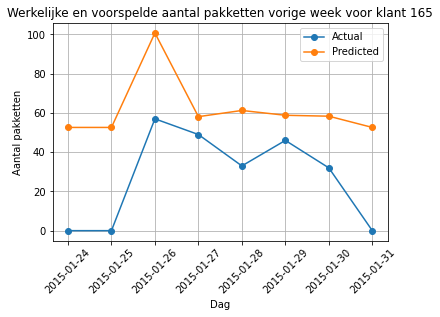

In [52]:
# Plot actual vs. predicted
fig, ax = plt.subplots()
ax.plot(test['procesdag'], y_test, label='Actual', marker='o')
ax.plot(test['procesdag'], pred, label='Predicted', marker='o')
ax.set(
    xlabel='Dag',
    ylabel='Aantal pakketten',
    title='Werkelijke en voorspelde aantal pakketten vorige week voor klant 165')
plt.xticks(rotation=45)
plt.grid()
plt.legend()
plt.show()

NameError: name 'np' is not defined